# Exploratory Data Analysis

In [1]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
sys.path.append('../scripts')
from data_loader import *
from eda import *

## Load Datasets

### Train Dataset

In [2]:
# path to the CSV file
filename = 'preprocessed_merged_20240531_015454.parquet'
path = os.path.join('..', 'data/02_intermediate', filename)

# Load dataset
merged_df = load_dataset(path)
merged_df['Promo2'] = merged_df['Promo2'].astype(float)
merged_df['Promo'] = merged_df['Promo'].astype(float)
merged_df['StateHoliday'] = merged_df['StateHoliday'].astype(float)
merged_df['SchoolHoliday'] = merged_df['SchoolHoliday'].astype(float)
merged_df['Assortment'] = merged_df['Assortment'].astype(float)

In [3]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,True,1.0,0.0,1.0,2,0.0,1270.0,9.0,2008.0,0.0,23.269093,2011.752774,-1
1,2,5,2015-07-31,6064,625,True,1.0,0.0,1.0,0,0.0,570.0,11.0,2007.0,1.0,13.000000,2010.000000,0
2,3,5,2015-07-31,8314,821,True,1.0,0.0,1.0,0,0.0,14130.0,12.0,2006.0,1.0,14.000000,2011.000000,0
3,4,5,2015-07-31,13995,1498,True,1.0,0.0,1.0,2,2.0,620.0,9.0,2009.0,0.0,23.269093,2011.752774,-1
4,5,5,2015-07-31,4822,559,True,1.0,0.0,1.0,0,0.0,29910.0,4.0,2015.0,0.0,23.269093,2011.752774,-1


## Test dataset

In [4]:
# path to the CSV file
filename = 'formatted_test_df.parquet'
path = os.path.join('..', 'data/02_intermediate', filename)

# Load dataset
formatted_test_df = load_dataset(path)
formatted_test_df

Error: [Errno 2] No such file or directory: '..\\data/02_intermediate\\formatted_test_df.parquet'. The dataset file was not found.


## Explore Promo Distribution

compare_promo_distribution(formatted_train_df,formatted_test_df)

## Analyze the sales behavior before, during, and after holidays.

Sales statistics by holiday type:
                     mean  median          std
StateHoliday                                  
0.0           5947.483893  5849.0  3767.890619
1.0            290.735686     0.0  1870.281698
2.0            214.311510     0.0  1816.918138
3.0            168.733171     0.0  1492.274865


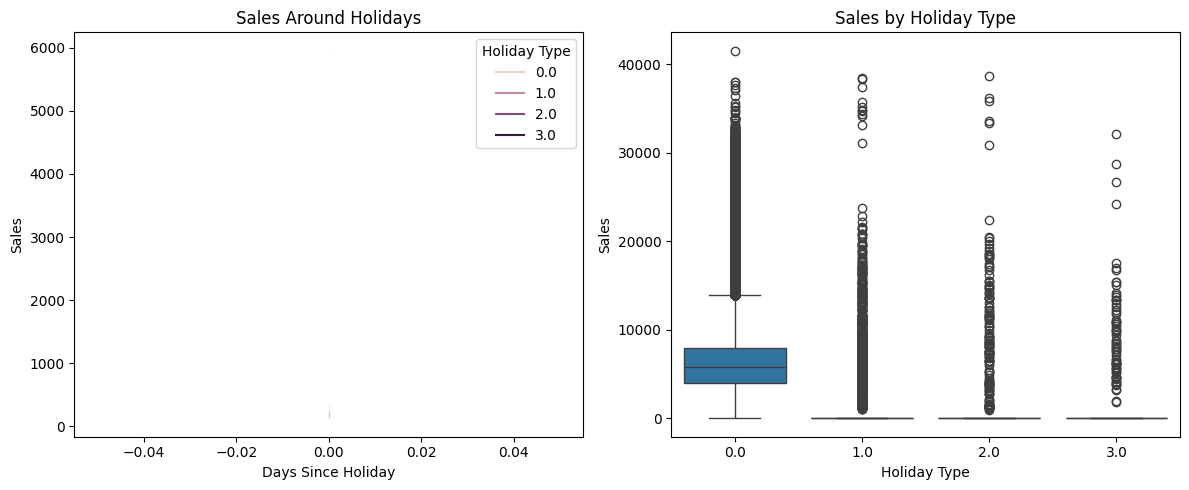

Observations:
Sales tend to be higher during state holidays.
No clear pattern in sales after state holidays.


In [5]:
analyze_sales_around_holidays(merged_df)

## Analyze seasonal purchase behaviors in the data

<Figure size 1200x800 with 0 Axes>

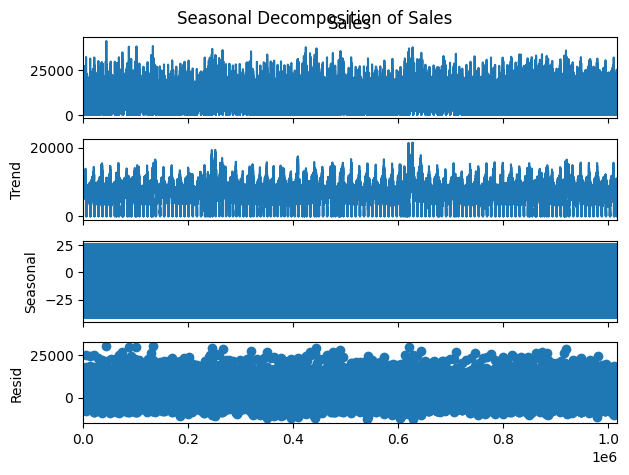

Observations:
Sales appear to be higher during periods without Promo2.
There are clear seasonal patterns in sales.


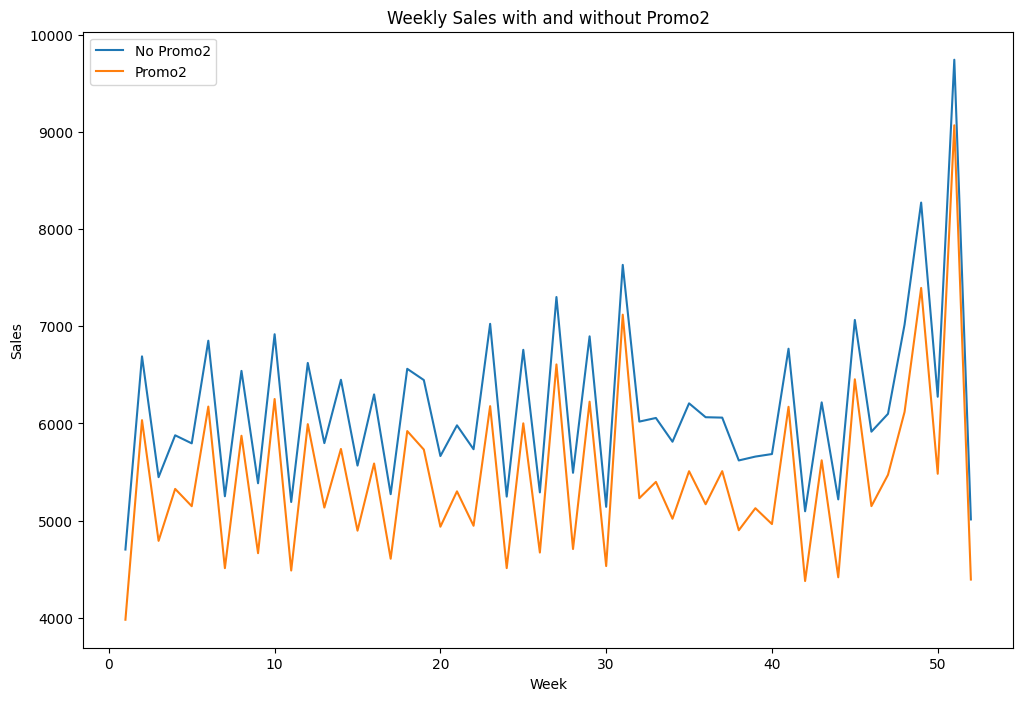

In [6]:
analyze_seasonal_purchases(merged_df)

## Analyze the correlation between sales and the number of customers

Correlation coefficient between Sales and Customers: 0.89


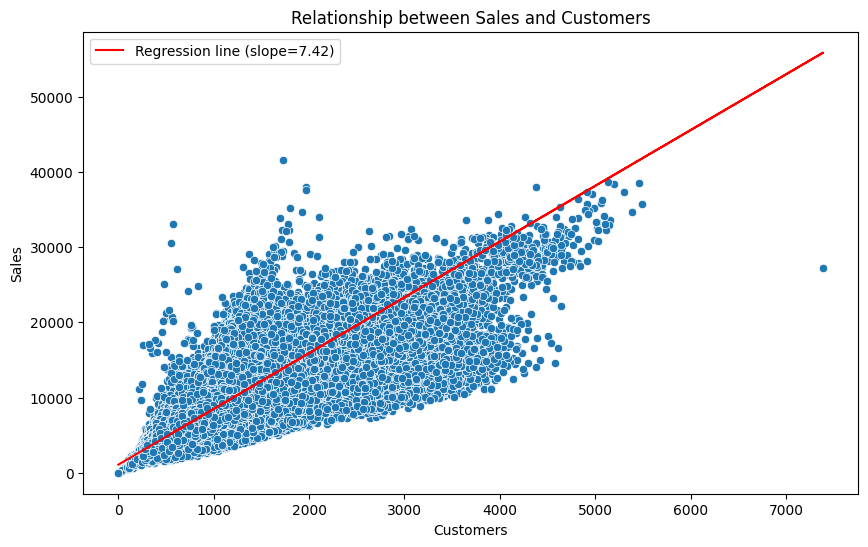

Implications for the sales forecasting model:
The positive correlation between sales and the number of customers suggests that the sales forecasting model should incorporate the customer count as a feature. This could improve the model's ability to predict sales accurately.


In [7]:
analyze_sales_customers_correlation(merged_df)

## Analyzing the impact of promotions on sales and customers

In [8]:
analyze_promo_impact(merged_df)

New customers during promotions: -7513859

Impact on new and existing customers:
Average increase in new customers during promotions: -7513859.00
Average number of existing customers without promotions: 517.82
Summary statistics by Promo:
             Sales                        Customers                    
              mean          std   count        mean         std   count
Promo                                                                  
0.0    4406.050805  3442.450020  629129  517.823542  452.881419  629129
1.0    7991.152046  3419.025495  388080  820.098815  419.897191  388080

T-test for Sales: t-statistic=511.55, p-value=0.0000
ANOVA for Sales: F-statistic=261680.52, p-value=0.0000
ANOVA for Customers: F-statistic=112976.71, p-value=0.0000


## Investigating the relationship between Promo, Sales etc..
Investigate the relationship between Promo, Sales, and other relevant features
to identify more effective ways of deploying promotions.

In [9]:
optimize_promo_deployment(merged_df)

Correlation matrix:
                              Store  DayOfWeek      Date     Sales  Customers  \
Store                      1.000000  -0.000008  0.000842  0.005126   0.024325   
DayOfWeek                 -0.000008   1.000000  0.000183 -0.462125  -0.386445   
Date                       0.000842   0.000183  1.000000  0.041904   0.012679   
Sales                      0.005126  -0.462125  0.041904  1.000000   0.894711   
Customers                  0.024325  -0.386445  0.012679  0.894711   1.000000   
Open                      -0.000047  -0.528963 -0.000157  0.678472   0.616768   
Promo                      0.000058  -0.392925  0.017249  0.452345   0.316169   
StateHoliday               0.000362  -0.044265  0.008197 -0.229029  -0.204295   
SchoolHoliday              0.000641  -0.205388  0.001068  0.085124   0.071568   
StoreType                 -0.021604   0.000051 -0.004407 -0.013057  -0.141423   
Assortment                 0.004419  -0.000052  0.004354  0.074941   0.007044   
Competit

## Analyzing the trends in customer behavior and sales during store opening and closing times.

Impact of store opening and closing on customer behavior and sales:
Open stores:
       Customers        Sales
mean  762.728395  6955.514291
std   401.227674  3104.214680

Closed stores:
      Customers  Sales
mean        0.0    0.0
std         0.0    0.0

Visualizing trends in Customers and Sales over time:


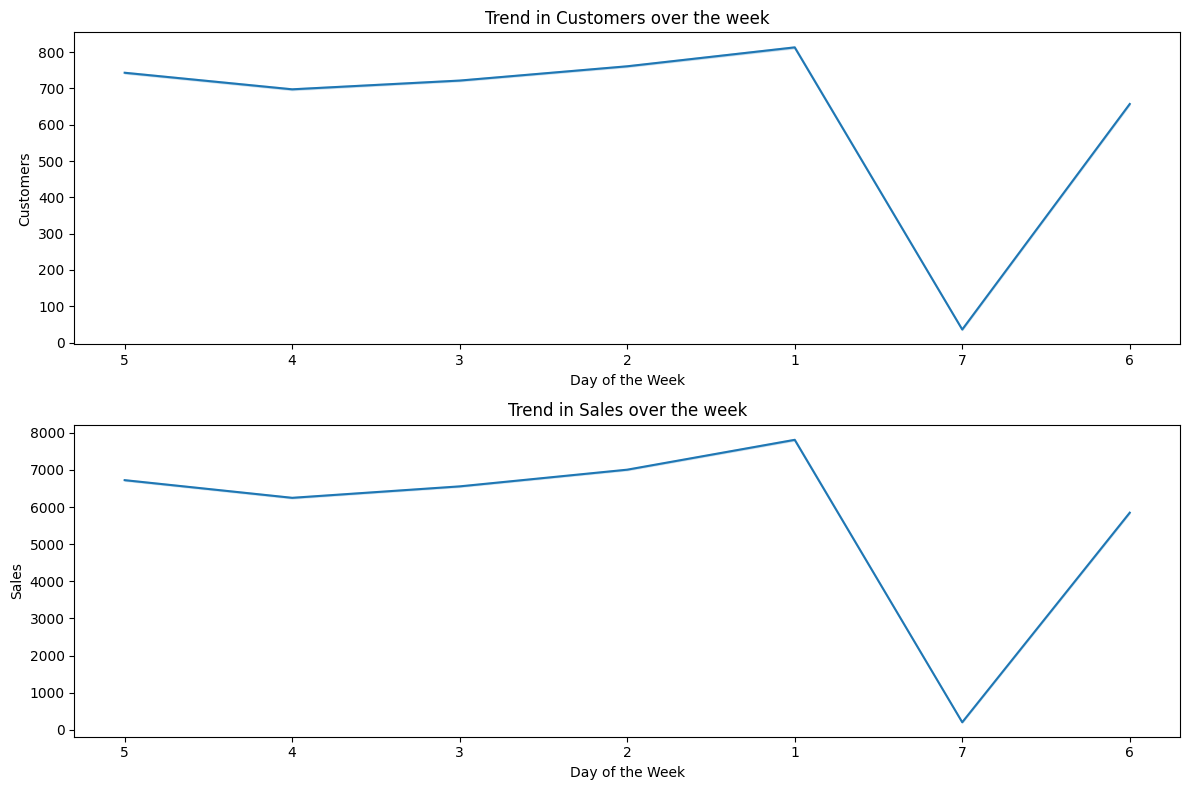


Insights for sales forecasting:
- Stores tend to have more customers when they are open compared to when they are closed.
- Stores tend to have higher sales when they are open compared to when they are closed.
- Customers and sales exhibit distinct trends over the course of the week, which could be useful for sales forecasting.


In [10]:
analyze_store_hours(merged_df)

## Identifying the stores that are open on all weekdays and analyze the impact on their weekend sales.

Stores open on all weekdays: []
Average weekend sales for stores open on all weekdays: nan
Average weekend sales for other stores: nan


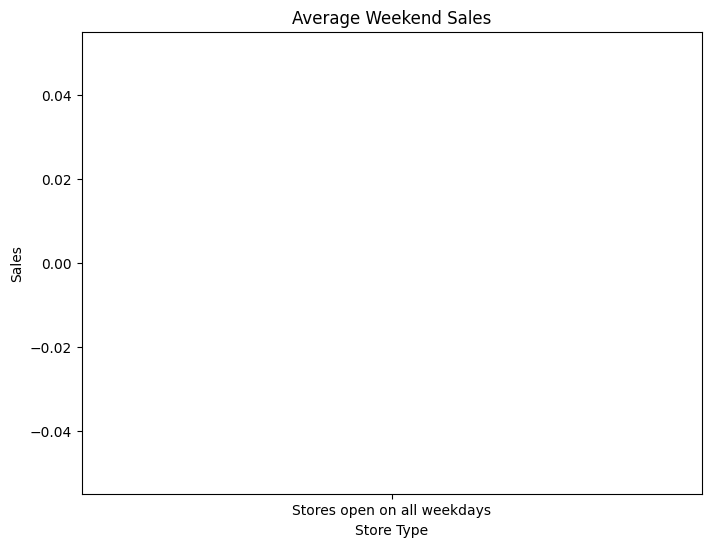

In [11]:
analyze_weekday_openings(merged_df)

## Analyze the relationship between assortment type and sales

Summary statistics of sales by assortment type:
                   mean  median          std  min    max
Assortment                                              
0.0         5481.026096  5463.0  3682.766186    0  38722
1.0         8553.931999  8026.5  3882.418206    0  22137
2.0         6058.676567  6039.0  3992.255662    0  41551

ANOVA test results:
F-statistic: 5057.07
p-value: 0.0000

Tukey's HSD post-hoc test results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
   0.0    1.0  3072.9059   0.0    2973.56  3172.2518   True
   0.0    2.0   577.6505   0.0   559.7345   595.5664   True
   1.0    2.0 -2495.2554   0.0 -2594.7069 -2395.8039   True
-----------------------------------------------------------


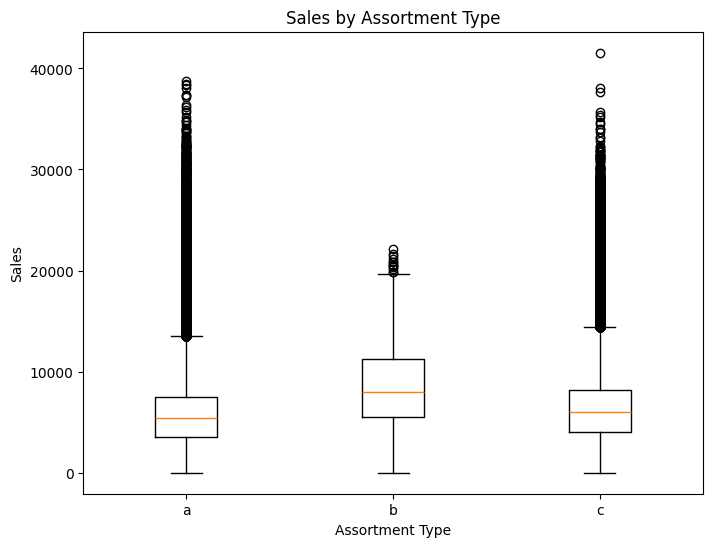

In [12]:
analyze_assortment_sales(merged_df)

##  Analyze the relationship between competition distance and sales

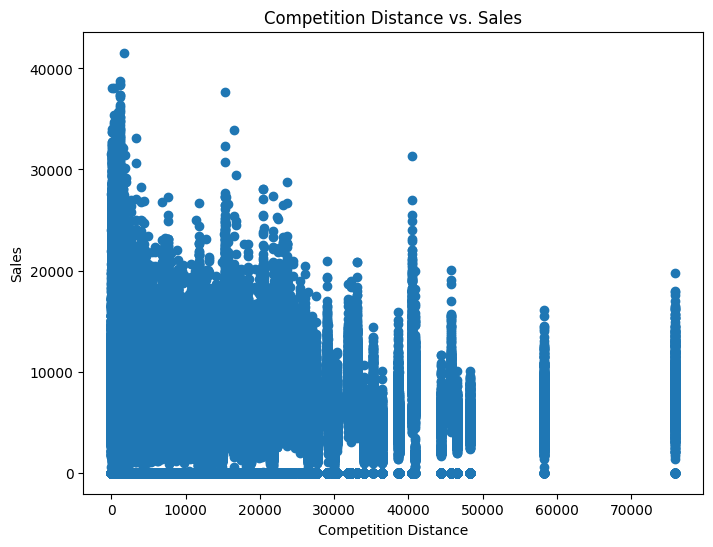

Pearson correlation coefficient: -0.02
p-value: 0.0000
Regression coefficient: -0.01
Intercept: 5825.94

Store Type '2':
Pearson correlation coefficient: 0.02
p-value: 0.0000

Store Type '0':
Pearson correlation coefficient: -0.02
p-value: 0.0000

Store Type '3':
Pearson correlation coefficient: 0.02
p-value: 0.0000

Store Type '1':
Pearson correlation coefficient: -0.25
p-value: 0.0000

Assortment '0.0':
Pearson correlation coefficient: -0.04
p-value: 0.0000

Assortment '2.0':
Pearson correlation coefficient: -0.02
p-value: 0.0000

Assortment '1.0':
Pearson correlation coefficient: -0.49
p-value: 0.0000


In [13]:
analyze_competition_distance_and_sales(merged_df)

In [16]:
analyze_new_competitors(merged_df)